# Кластеризация известного датасета [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)

Используется [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Что здесь делается?
- загружается датасет ирисов
- из него убирается поле _Species_ - предопределенные кластеры
- с помощью модели KMeans делается попытка кластеризации датасета с количеством кластеров от 2 до 10
- сохраняется показатель инерции для каждого результата кластеризации
- строится график инерции в зависимости от количества кластеров
- на графике визуально ищется "точка локтя", которая показывает оптимальное количество кластеров для этого набора данных
- найденное значение сравнивается с заранее известным из набора (n_clusters=3), с ним производится окончательная кластеризация
- анализируется количество в каждом кластере, сравнивается и заранее известным (50 в каждом), делается оценка правильности выбора модели кластеризации

In [1]:
#TODO попробовать другие методы кластеризации, чтобы улучшить результат
#TODO искать решение на kaggle

[**Wiki** Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)
[**kaggle** Iris Species](https://www.kaggle.com/datasets/uciml/iris)

_3 класса ирисов по 50 наблюдений в каждом_

- Setosa
- Versicolour
- Virginica

_Атрибуты_

- sepal length in cm (чашелистик)
- sepal width in cm
- petal length in cm (лепесток)
- petal width in cm
- class

Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
iris_df = pd.read_csv('../../data/KMeans_Clustering_Iris.csv', index_col='Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
iris_df.groupby("Species").agg({"SepalLengthCm":"mean",
                            "SepalWidthCm":"mean",
                            "PetalLengthCm":"mean",
                            "PetalWidthCm":"mean"})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [9]:
iris_df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Попытаемся определить оптимальное количество кластеров, используя метрики Инерция и Силуэт

In [10]:
labels = iris_df['Species']
iris = iris_df.drop(columns=['Species'])
stats = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(iris)
    silhouette = sklearn.metrics.silhouette_score(iris, kmeans.labels_, metric='euclidean')
    stats.append([n_clusters, kmeans.inertia_, kmeans.n_iter_, silhouette])

<Axes: xlabel='n_clusters', ylabel='inertia'>

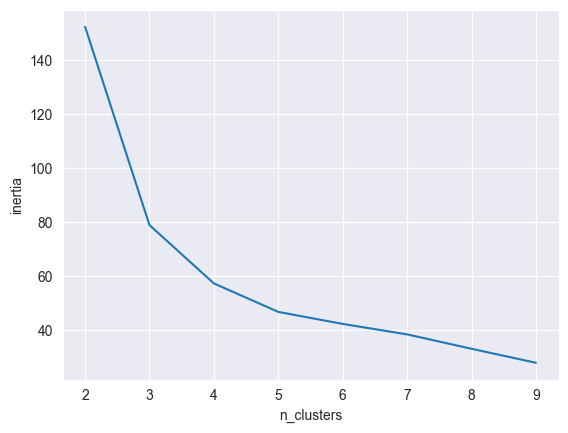

In [11]:
sns.lineplot(data=pd.DataFrame.from_records(stats, columns=['n_clusters', 'inertia',  'n_iters', 'silhouette']), x='n_clusters', y='inertia')

<Axes: xlabel='n_clusters', ylabel='silhouette'>

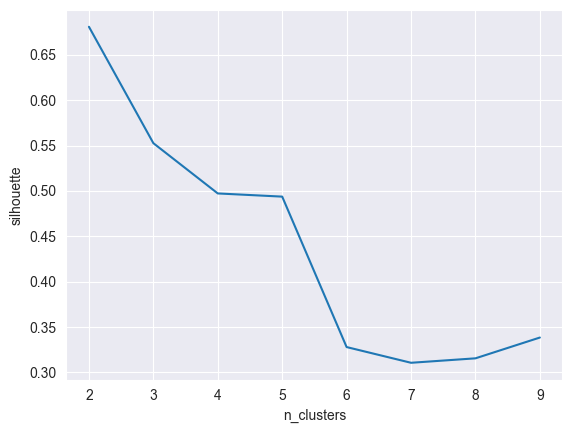

In [12]:
sns.lineplot(data=pd.DataFrame.from_records(stats, columns=['n_clusters', 'inertia',  'n_iters', 'silhouette']), x='n_clusters', y='silhouette')

In [13]:
kmeans = KMeans(n_clusters=3).fit(iris)

In [14]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 61, 1: 50, 2: 39}


Разобьем датасет на тренировочный и проверочный

In [15]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
train_index, test_index = next(sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123).split(X=iris, y=labels))
X_train = iris.values[train_index]
X_test = iris.values[test_index]
y_train = labels[train_index]
y_test = labels[test_index]
# y_train = labels.values[train_index]
# y_test = labels.values[test_index]

In [17]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
indices

array([[  0,  94],
       [  1,  97],
       [  2, 101],
       [  3,  68],
       [  4,  83],
       [  5,  51],
       [  6, 118],
       [  7,  63],
       [  8, 117],
       [  9,  89],
       [ 10,  84],
       [ 11, 105],
       [ 12,  48],
       [ 13, 100],
       [ 14,  19],
       [ 15,  73],
       [ 55,  16],
       [ 17,  73],
       [ 18, 110],
       [ 19,  41],
       [ 20, 105],
       [ 21,  30],
       [ 22,  87],
       [ 23, 106],
       [ 24,  66],
       [ 25,  59],
       [ 26,   4],
       [ 27,  56],
       [ 28,  77],
       [ 29,  78],
       [ 30,  88],
       [ 31,  69],
       [ 32,  35],
       [ 33,  99],
       [ 34,  63],
       [ 35, 117],
       [ 36,  78],
       [ 37,  85],
       [ 38,  79],
       [ 39,  62],
       [ 40,   4],
       [ 41,  98],
       [ 42, 116],
       [ 43,  44],
       [ 44,  43],
       [ 45, 100],
       [ 46,  64],
       [ 47,  82],
       [ 48,  12],
       [ 49,  76],
       [ 50,  88],
       [ 51,   5],
       [ 52,